<a href="https://colab.research.google.com/github/kaljuvee/datascience/blob/master/notebooks/stats/timeseries/sales_prediction_prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
! pip install fbprophet
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/kaljuvee/datascience/master/notebooks/alternative_data/data/sales-dataset-20200603.csv')
df.head()

,date,sales,stock,price
0,01/01/2014,0,4972,1.29
1,02/01/2014,70,4902,1.29
2,03/01/2014,59,4843,1.29
3,04/01/2014,93,4750,1.29
4,05/01/2014,96,4654,1.29


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    937 non-null    object 
 1   sales   937 non-null    int64  
 2   stock   937 non-null    int64  
 3   price   937 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 29.4+ KB


In [ ]:
df.describe()

,sales,stock,price
count,937.000000,937.000000,937.000000
mean,90.533618,1608.258271,1.592572
std,80.682089,1356.691877,0.529502
min,0.000000,0.000000,0.000000
25%,33.000000,794.000000,1.290000
50%,76.000000,1348.000000,1.390000
75%,127.000000,1964.000000,1.890000
max,542.000000,7228.000000,2.980000


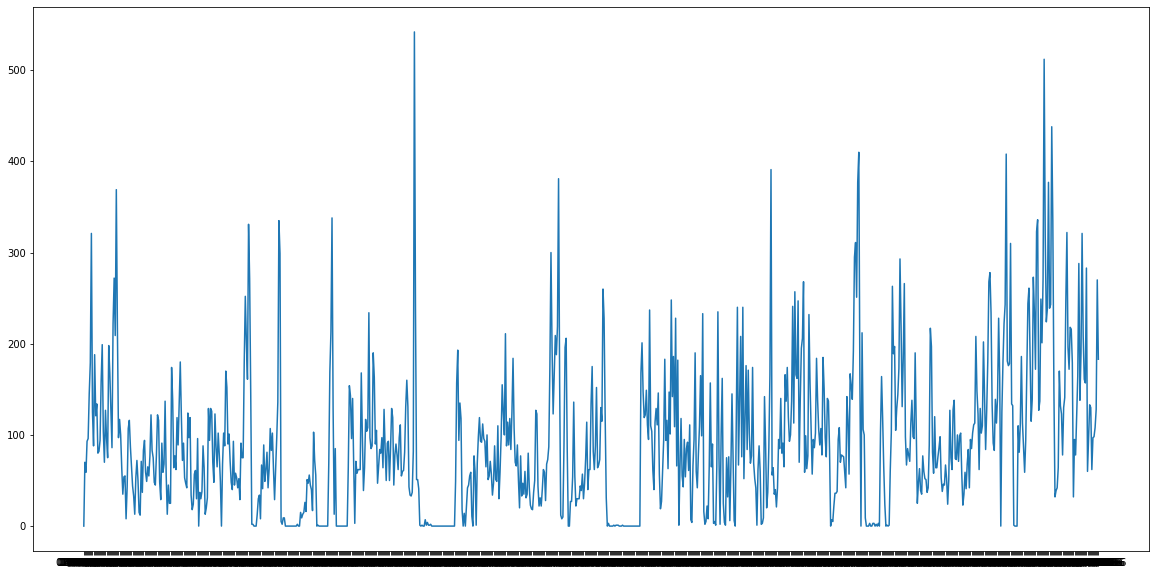

In [ ]:
# very noisy
plt.figure(figsize=(20,10))
plt.plot(df['date'], df['sales'])

In [ ]:
train_df = pd.DataFrame()
train_df['ds'] = pd.to_datetime(df['date'])
train_df['y'] = df['sales']
train_df.tail()


,ds,y
932,2016-07-27,98
933,2016-07-28,108
934,2016-07-29,128
935,2016-07-30,270
936,2016-07-31,183


In [ ]:
prophet_basic = Prophet()
prophet_basic.add_country_holidays(country_name = 'UK')
prophet_basic.fit(train_df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future_df = prophet_basic.make_future_dataframe(periods=91)
future_df.shape

(1028, 1)

In [ ]:
forecast_df = prophet_basic.predict(future_df)
forecast_df[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1023,2017-03-04,198.902074,105.771578,292.612738
1024,2017-03-05,176.564247,91.704256,272.590143
1025,2017-03-06,165.380980,69.021408,258.713763
1026,2017-03-07,173.429466,84.196616,263.627819
1027,2017-03-08,186.631162,96.839942,284.124445


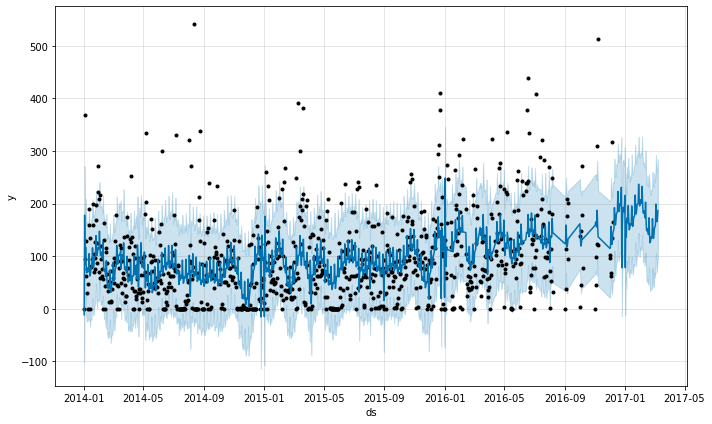

In [ ]:
basic_fig = prophet_basic.plot(forecast_df)

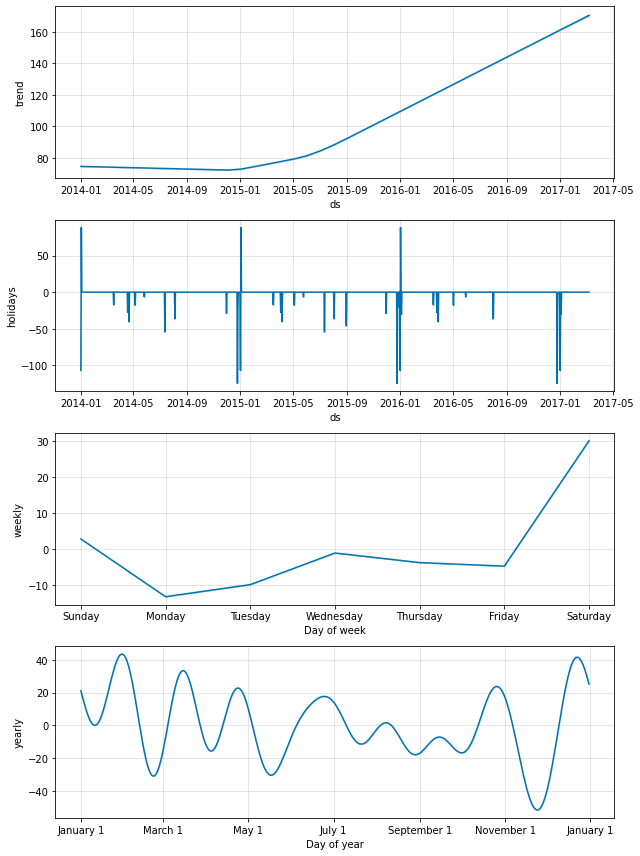

In [ ]:
comp_fig = prophet_basic.plot_components(forecast_df)

In [ ]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(prophet_basic, initial='936 days', period='91 days', horizon = '91 days')
df_cv.head()

INFO:fbprophet:Making 1 forecasts with cutoffs between 2016-09-07 00:00:00 and 2016-09-07 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2016-10-01,163.824778,79.480175,258.414953,3,2016-09-07
1,2016-10-02,133.750700,46.100602,217.050933,138,2016-09-07
2,2016-10-03,120.900911,29.487925,214.393094,46,2016-09-07
3,2016-10-04,124.408951,33.811460,213.713621,148,2016-09-07
4,2016-10-05,134.717955,47.108924,231.873453,178,2016-09-07


In [ ]:
from fbprophet.diagnostics import performance_metrics
df_basic = performance_metrics(df_cv)
df_basic.head()

INFO:fbprophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,coverage
0,25 days,12941.332963,113.759980,82.537039,26.819526,0.5
1,26 days,2814.101497,53.048105,39.575105,0.829536,1.0
2,27 days,3083.342006,55.527849,49.245980,0.893840,1.0
3,28 days,1214.936513,34.855939,33.436547,0.201278,1.0
4,29 days,10427.627120,102.115754,90.528465,0.375776,0.5


In [ ]:
df.rename({'date':'ds', 'sales':'y'}, axis=1, inplace=True)
train_x = df
#test_x = df[800:]
prophet_multiple = Prophet()
prophet_multiple.add_country_holidays(country_name = 'UK')
prophet_multiple.add_regressor('stock')
prophet_multiple.add_regressor('price')
prophet_multiple.fit(train_x)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future_data = prophet_multiple.make_future_dataframe(periods=91)

In [ ]:
forecast_data = prophet_multiple.predict(test_x)
prophet_multiple.plot(forecast_data);

In [ ]:
df_cv = cross_validation(prophet_multiple, initial='936 days', period='91 days', horizon = '91 days')
df_cv.head()

INFO:fbprophet:Making 1 forecasts with cutoffs between 2016-09-07 00:00:00 and 2016-09-07 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2016-10-01,146.657246,65.289273,227.454952,3,2016-09-07
1,2016-10-02,127.993543,33.564469,213.194332,138,2016-09-07
2,2016-10-03,112.146075,17.211712,200.094407,46,2016-09-07
3,2016-10-04,103.168415,14.900880,193.113574,148,2016-09-07
4,2016-10-05,115.737712,31.656388,202.943904,178,2016-09-07


In [ ]:
df_multiple = performance_metrics(df_cv)
df_multiple.head()

INFO:fbprophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,coverage
0,25 days,10368.766822,101.827142,76.831852,23.979130,0.5
1,26 days,2237.716200,47.304505,38.076266,0.755234,1.0
2,27 days,3192.587093,56.502983,55.488830,0.870437,1.0
3,28 days,2943.231751,54.251560,53.546936,0.326352,1.0
4,29 days,10684.859122,103.367592,97.261934,0.418919,0.5


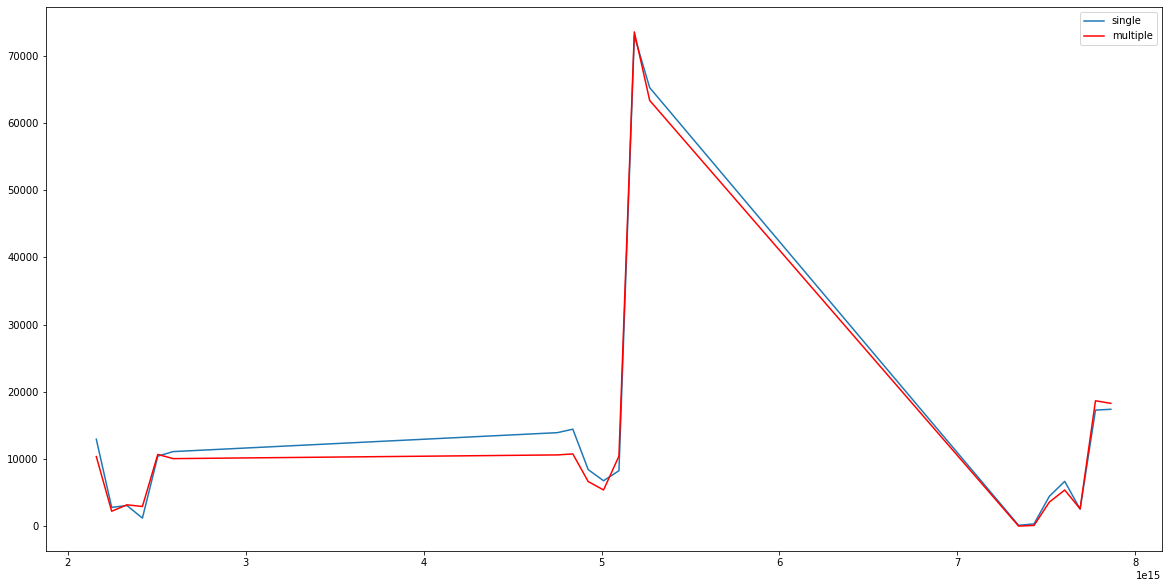

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(df_basic['horizon'], df_basic['mse'])
plt.plot(df_multiple['horizon'], df_multiple['mse'], 'r')
plt.legend(['single', 'multiple'])